In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import tensorflow as tf
from tqdm import tqdm
import itertools
from tensorflow.keras.models import load_model
import random
from tensorflow.keras.preprocessing import image
from matplotlib import interactive
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import TensorBoard
import pickle
import time
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import backend as K
import matplotlib.image as mpimg



C:/Users/20115/Desktop/Covid_Phenomena_Dataset/train\Covid


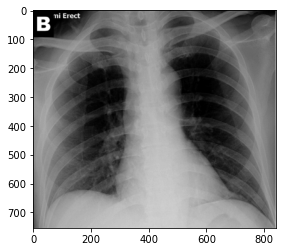

In [2]:
# Write the URL OF THE DATASET "Covid_phenomen_Dataset"
DATADIR = "C:/Users/20115/Desktop/Covid_Phenomena_Dataset/train"
TestData = "C:/Users/20115/Desktop/Covid_Phenomena_Dataset/Validation"
#classification using label Covid phenomena and Normal
CATEGORIES = ["Covid","Normal","Phenomena"]

#adding all images in 3 folders of the dataset
#in arraylist of images 
for cat in CATEGORIES:
    path = os.path.join(DATADIR,cat)
    print(path)
    for img in os.listdir(path):
        img_array= cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array ,cmap="gray")
        plt.show()
        break
    break
            

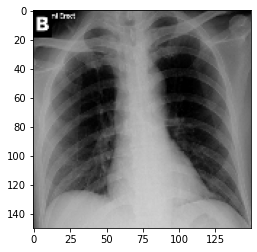

In [3]:
IMG_SIZE = 150

new_array = cv2.resize(img_array ,(IMG_SIZE,IMG_SIZE))
plt.imshow(new_array ,cmap="gray")

In [4]:
TEST_DIR ="C:/Users/20115/Desktop/Covid_Phenomena_Dataset/validation/"
test_data = []
CATEGORIES = ["Covid", "Normal","Phenomena"]

def create_test_data():
    for category in CATEGORIES:  #iterate through the 3 folders 

        path = os.path.join(TEST_DIR,category)  # create path to Covid ,Normal and phenomena
        class_num = CATEGORIES.index(category)  # get the classification  (0 ,1 ,2 ). 0=Covid 1=Normal 2=Phenomena

        for img in tqdm(os.listdir(path)):  # iterate over each image per Covid ,Normal and Phenomena
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                new_arr1=new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 1)
                test_data.append([new_arr1, class_num])  # add this to test_data
            except Exception as e:  # keep the output clean...
                pass


create_test_data()

print(len(test_data))

100%|██████████| 67/67 [00:02<00:00, 29.68it/s]

201


In [5]:
import random

random.shuffle(test_data)

In [6]:
X_val = []
y_val= []

for features,label in test_data:
    X_val.append(features)
    y_val.append(label)



X_val = np.array(X_val).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
y_val =np.array(y_val)
print(y_val)
print(len(X_val))

[2 1 0 1 2 0 0 1 2 0 1 2 1 2 1 0 2 0 1 0 0 0 0 1 2 2 2 1 0 0 0 0 0 1 0 0 0
 2 0 1 1 2 1 0 0 1 1 0 0 1 2 2 1 2 0 2 1 1 2 0 0 2 1 1 2 0 0 2 1 0 1 1 2 2
 0 0 1 1 0 0 1 0 2 2 0 2 0 0 2 0 1 2 2 1 0 2 2 0 0 2 1 0 2 0 2 0 1 2 1 0 2
 1 2 2 1 1 1 1 1 2 0 0 0 2 1 1 1 0 0 2 2 1 1 0 0 0 0 0 2 2 2 2 1 1 2 1 1 1
 1 2 1 1 1 0 2 2 2 2 1 0 1 2 2 0 0 2 1 2 1 0 2 0 2 2 2 1 1 1 2 1 2 1 2 0 0
 2 0 2 2 2 1 2 1 0 1 1 0 1 2 0 1]
201


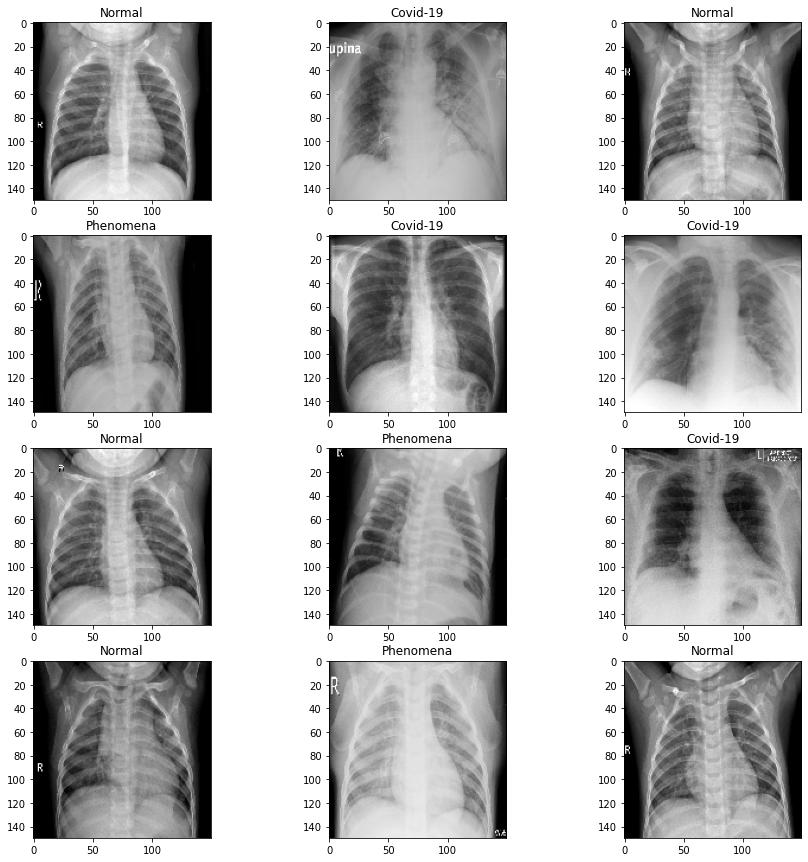

In [7]:
# # Display first 15 images of moles, and how they are classified
w=15
h=15
fig=plt.figure(figsize=(15, 15))
columns = 4
rows = 3
X_val=X_val.squeeze()
for i in range(1, columns*rows +1):
    ax = fig.add_subplot(columns, rows, i)
    if y_val[i] == 0:
        ax.title.set_text('Covid-19')
        plt.imshow(X_val[i], cmap="gray")
    elif y_val[i] == 1 :
        ax.title.set_text('Normal')
        plt.imshow(X_val[i], cmap="gray")
    else :
        ax.title.set_text('Phenomena')
        plt.imshow(X_val[i], cmap="gray")
    
plt.show()

In [8]:

images = []
actual=[]
CATEGORIES = ["Covid", "Normal","Phenomena"]
CATEGORIES1 = ["Covid-19", "Normal","Phenomena"]
#To test specific Model change the name of the the model to the Saved name of the wanted Model"
model = tf.keras.models.load_model("Covid_Phenomena_FirstTrail.model")
TEST_DIR ="C:/Users/20115/Desktop/Covid_Phenomena_Dataset/validation/"
for category in CATEGORIES:  # iterate through the 3 folders
     path = os.path.join(TEST_DIR,category)
     class_num = CATEGORIES.index(category) 
     for img in os.listdir(path):
         # create path to Covid ,Normal and Phenomena
        IMG_SIZE = 150  # 150 image size
        img_array = cv2.imread(os.path.join(path,img))  # convert to array
        new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
        new_array=new_array.reshape(1, IMG_SIZE, IMG_SIZE, 3)
        actual.append([new_array, class_num])
        images.append(new_array/255.)
        
        # append the images list to the stack to pass for prediction
images = np.vstack(images)

X_train=[]
y_train=[]

X_test = []
y_test = []

for f,l in actual:
    X_test.append(f)
    y_test.append(l)
for f,l in actual:
    X_train.append(f)
    y_train.append(l)

X_test = np.array(X_test).reshape(-3, IMG_SIZE, IMG_SIZE, 3)
y_test =np.array(y_test)


X_test=X_test/255.0

X_train = np.array(X_train).reshape(-3, IMG_SIZE, IMG_SIZE, 3)
y_train =np.array(y_train)


X_train=X_train/255.0
X_Test2=X_test.squeeze()





201
11


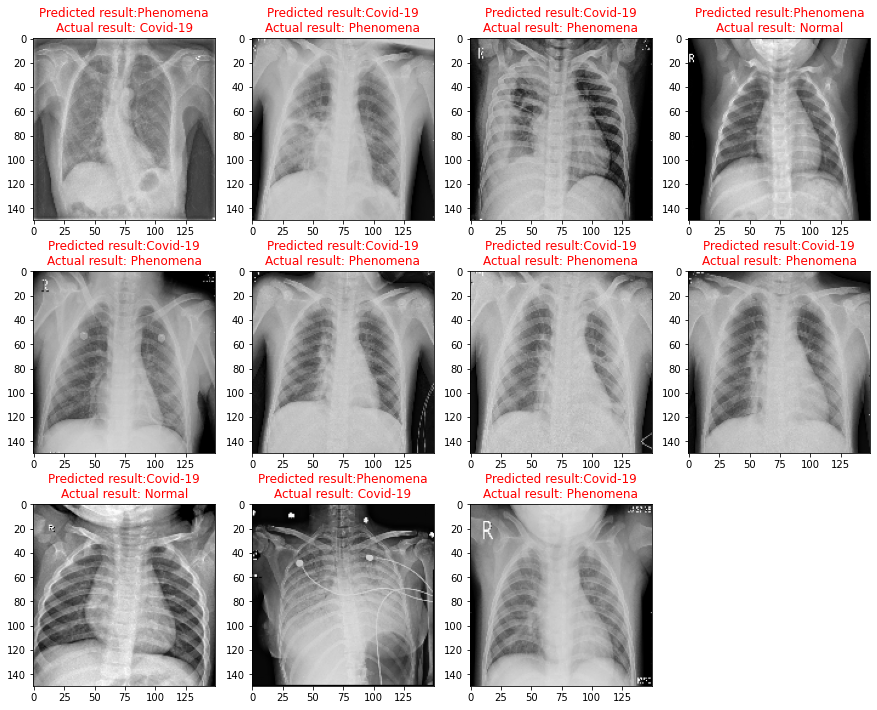

In [9]:
#To test specific Model change the name of the the model to the Saved name of the wanted Model"
model = tf.keras.models.load_model('Covid_Phenomena_FirstTrail.model')
i=0
prop_class=[]
mis_class=[]
classes = model.predict(images)

print(len(y_test))
for i in range(len(y_test)):
    if(np.argmax(classes[i]))==y_test[i]:
        prop_class.append(i)

i=0
for i in range(len(y_test)):
    if([np.argmax(classes[i])])!=y_test[i]:
        mis_class.append(i)
print(len(mis_class))
random.shuffle(prop_class)
random.shuffle(mis_class)

w=60
h=40
fig=plt.figure(figsize=(15,25))
columns = 4
rows = 6

    
for i in range(len(mis_class)):
    ax = fig.add_subplot(rows, columns, i+1)
    ax.set_title("Predicted result:"+ CATEGORIES1[np.argmax(classes[mis_class[i]])]
                       +"\n"+"Actual result: "+ CATEGORIES1[y_test[mis_class[i]]] , fontdict={'color': 'red', 'fontweight': 'medium'})
    ax.Color = 'red';
    ax.imshow(X_Test2[mis_class[i]], cmap="gray")

C:\Users\20115\Anaconda3\envs\Covidgp\lib\site-packages\ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


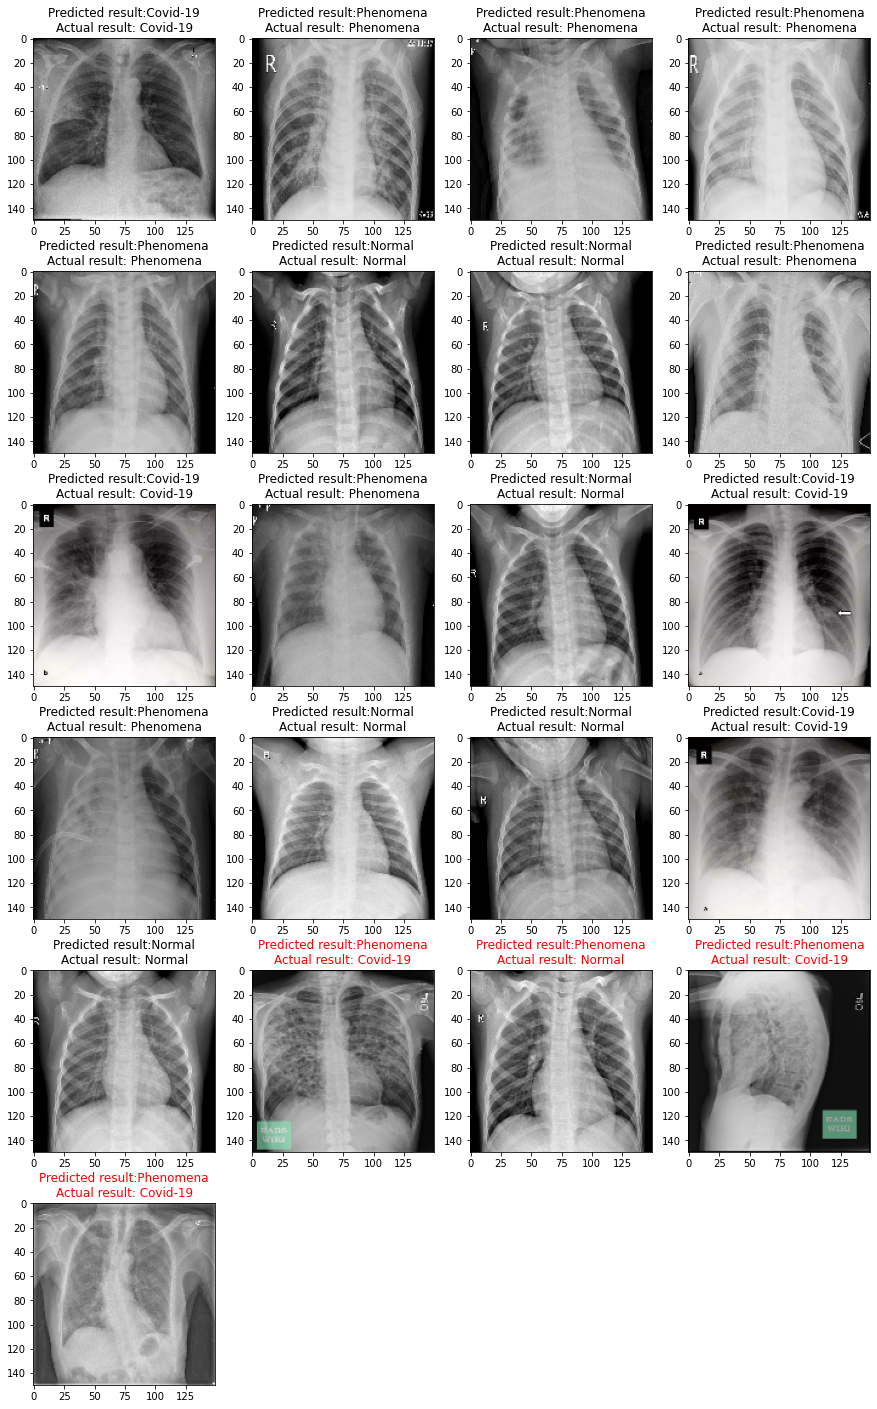

In [11]:
w=60
h=40
fig=plt.figure(figsize=(15,25))
columns = 4
rows = 6 
for i in range(0,19):
    ax = fig.add_subplot(rows, columns, i+1)
    ax.set_title("Predicted result:"+ CATEGORIES1[np.argmax(classes[prop_class[i]])]
                       +"\n"+"Actual result: "+ CATEGORIES1[y_test[prop_class[i]]] )
    ax.Color = 'red';
    ax.imshow(X_Test2[prop_class[i]], cmap="gray")
    
for y in range(4):
    ax1 = fig.add_subplot(rows, columns, y+i)
    ax1.set_title("Predicted result:"+ CATEGORIES1[np.argmax(classes[mis_class[y]])]
                       +"\n"+"Actual result: "+ CATEGORIES1[y_test[mis_class[y]]] , fontdict={'color': 'red', 'fontweight': 'medium'})
    ax1.Color = 'red';
    ax1.imshow(X_Test2[mis_class[y]], cmap="gray")
plt.show()


Confusion matrix, without normalization
[[64  0  0]
 [ 0 66  0]
 [ 3  1 67]]
Classification Report
0.9800995024875622
              precision    recall  f1-score   support

    Covid-19       1.00      0.96      0.98        67
      Normal       1.00      0.99      0.99        67
   Phenomena       0.94      1.00      0.97        67

    accuracy                           0.98       201
   macro avg       0.98      0.98      0.98       201
weighted avg       0.98      0.98      0.98       201



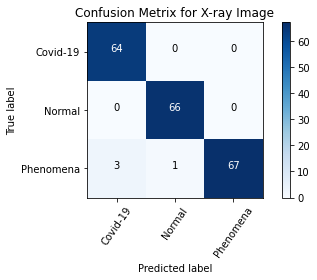

In [12]:
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=55)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

cm = confusion_matrix(np.argmax(classes, axis=1), y_test)

cm_plot_label =['Covid-19', 'Normal',"Phenomena"]
plot_confusion_matrix(cm, cm_plot_label, title ='Confusion Metrix for X-ray Image')

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score

print('Classification Report')
accuracy_score(np.argmax(classes, axis=1), y_test)
print(accuracy_score(np.argmax(classes, axis=1), y_test))
target_names = ['Covid-19', 'Normal',"Phenomena"]
 
report = classification_report(y_test, np.argmax(classes, axis=1), target_names=target_names)
print(report) 
    

In [64]:

from scipy import interp
import matplotlib.pyplot as plt
from itertools import cycle
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_auc_score
CATEGORIES = ["Covid-19", "Normal","Phenomina"]
#To test specific Model change the name of the the model to the Saved name of the wanted Model"
model = tf.keras.models.load_model('Covid_Phenomena_7.model')
y_prob = model.predict_proba(X_test)

macro_roc_auc_ovo = roc_auc_score(y_test, y_prob, multi_class="ovo",
                                  average="macro")
weighted_roc_auc_ovo = roc_auc_score(y_test, y_prob, multi_class="ovo",
                                     average="weighted")
macro_roc_auc_ovr = roc_auc_score(y_test, y_prob, multi_class="ovr",
                                  average="macro")
weighted_roc_auc_ovr = roc_auc_score(y_test, y_prob, multi_class="ovr",
                                     average="weighted")
print("One-vs-One ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
      "(weighted by prevalence)"
      .format(macro_roc_auc_ovo, weighted_roc_auc_ovo))
print("One-vs-Rest ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
      "(weighted by prevalence)"
      .format(macro_roc_auc_ovr, weighted_roc_auc_ovr))

One-vs-One ROC AUC scores:
0.996287 (macro),
0.996287 (weighted by prevalence)
One-vs-Rest ROC AUC scores:
0.996287 (macro),
0.996287 (weighted by prevalence)


In [65]:

model.fit(X_train, to_categorical(y_train), epochs=5, batch_size=100, verbose=1)

Train on 201 samples
Epoch 1/5
201/201 [==============================] - 2s 12ms/sample - loss: 2.5242 - accuracy: 0.6866
Epoch 2/5
201/201 [==============================] - 2s 8ms/sample - loss: 0.2461 - accuracy: 0.9303
Epoch 3/5
201/201 [==============================] - 2s 8ms/sample - loss: 0.1460 - accuracy: 0.9602
Epoch 4/5
201/201 [==============================] - 2s 8ms/sample - loss: 0.1177 - accuracy: 0.9403
Epoch 5/5
201/201 [==============================] - 2s 8ms/sample - loss: 0.0824 - accuracy: 0.9602


C:\Users\20115\Anaconda3\envs\Covidgp\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


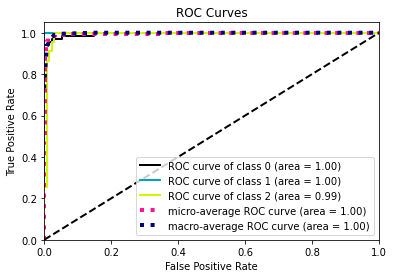

In [66]:
import scikitplot as skplt
#To test specific Model change the name of the the model to the Saved name of the wanted Model"
model = tf.keras.models.load_model('Covid_Phenomena_FirstTrail.model')
y_prob = model.predict_proba(X_test)
y_true = y_test

skplt.metrics.plot_roc_curve(y_true, y_prob)
plt.show()

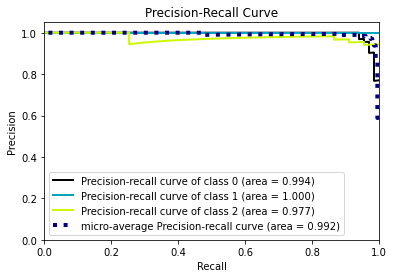

In [67]:
#To test specific Model change the name of the the model to the Saved name of the wanted Model"
model = tf.keras.models.load_model('Covid_Phenomena_FirstTrail.model')
skplt.metrics.plot_precision_recall(y_test, y_prob)

plt.show()




In [68]:
import os
os.environ["PATH"] += os.pathsep + r'C:\Users\20115\Desktop\release\bin'

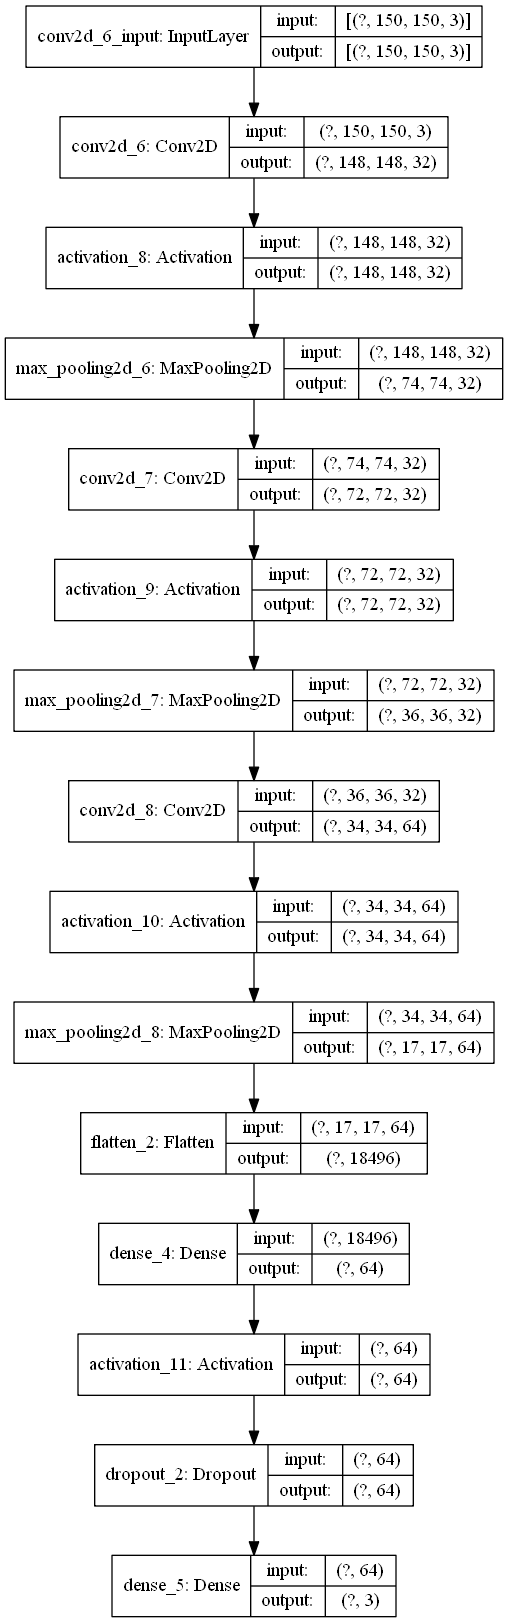

In [69]:
from tensorflow.keras.utils import plot_model
import tensorflow as tf
import numpy as np
import graphviz
import pydot_ng as pydot
#To test specific Model change the name of the the model to the Saved name of the wanted Model"
model = tf.keras.models.load_model('Covid_Phenomena_FirstTrail.model')
plot_model(model, to_file='model6.png', show_shapes=True, show_layer_names=True)

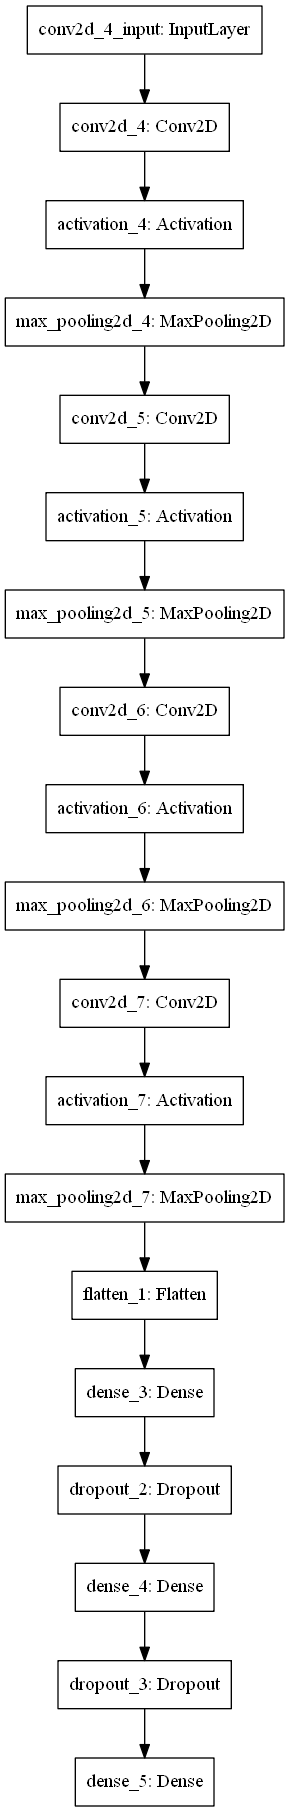

In [24]:
from tensorflow.keras.utils import plot_model
from tensorflow.keras.applications.resnet50 import ResNet50
import numpy as np
#To test specific Model change the name of the the model to the Saved name of the wanted Model"
model = tf.keras.models.load_model('Covid_Phenomena_FirstTrail.model')
tf.keras.utils.plot_model(
    model,
    to_file="model.png",
    show_shapes=False,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=False,
    dpi=96,
)

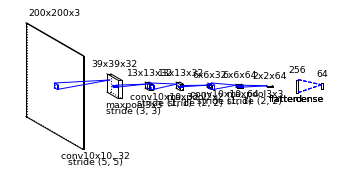

In [16]:
from convnet_drawer import Model, Conv2D, MaxPooling2D, Flatten, Dense
from pptx_util import save_model_to_pptx
from matplotlib_util import save_model_to_file

model = Model(input_shape=(200, 200, 3))
model.add(Conv2D(32, (10, 10), (5, 5)))
model.add(MaxPooling2D((3, 3), strides=(3, 3)))
model.add(Conv2D(32, (10, 10), padding="same"))
model.add(MaxPooling2D((2, 2), strides=(2, 2)))
model.add(Conv2D(64, (10, 10), padding="same"))
model.add(MaxPooling2D((3, 3), strides=(2, 2)))
model.add(Flatten())
model.add(Dense(64))
# save as svg file
model.save_fig("example.svg")

# save as pptx file
save_model_to_pptx(model, "example.pptx")

# save via matplotlib
save_model_to_file(model, "example.pdf")